In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

input_file = "c:\\diabetes.csv"
df = pd.read_csv(input_file, header = 0)
df.shape
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
numpy_array = df.to_numpy()
X = numpy_array[:,:-1]
y = numpy_array[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Number of mislabeled points out of a total 538 points : 186
The accuracy is 0.65


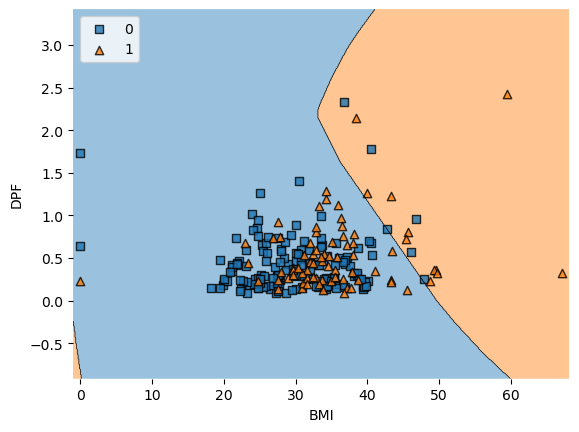

In [8]:
# Only use BMI and DiabetesPedigreeFunction as the input features
XX = numpy_array[:,[5,6]]
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.7, random_state=0)
# perform Multiperceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1,hidden_layer_sizes=100,max_iter=300)
classifier = mlp.fit(XX_train, y_train)
y_pred = classifier.predict(XX_test)
print("Number of mislabeled points out of a total %d points : %d" %(XX_test.shape[0], (y_test != y_pred).sum()))
Acc = (XX_test.shape[0]-(y_test != y_pred).sum())/XX_test.shape[0]
print(f"The accuracy is {Acc :.2f}")

## Plot the decision boundary
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
plot_decision_regions(XX_train, y_train.astype(np.int_),clf=classifier)
plt.xlabel('BMI')
plt.ylabel('DPF')
plt.legend(loc='upper left')
plt.show()

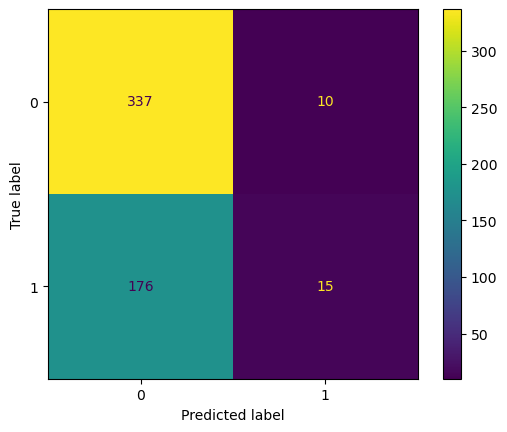

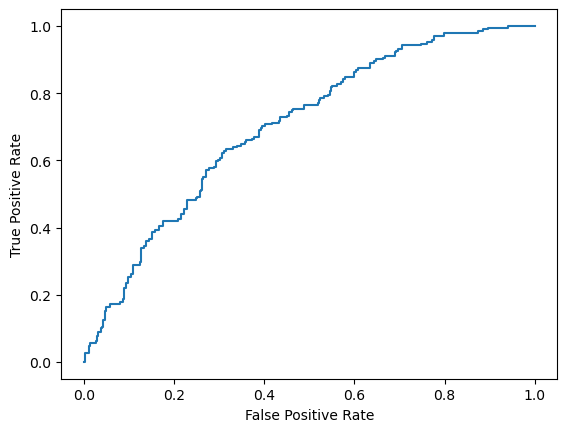

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
CF = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(CF).plot()
from sklearn.metrics import RocCurveDisplay, roc_curve
y_score = classifier.predict_proba(XX_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:,1], pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [31]:
(y_test != y_pred).sum()

68